# Disease prediction using Machine Learning models

This data model has **my own modifications** based on the tutorial found at the following URL
https://www.geeksforgeeks.org/disease-prediction-using-machine-learning/?ref=lbp

The dataset was downloaded from Kaggle.com. It is divided into two datasets: one called 'training' and another called 'test.

The link to the dataset is:\
https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning

## Importing libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

## Uploading the dataset

We have downloaded the dataset, but for convenience, we load it into Colab to work with it.

In [6]:
# Reading the train.csv by removing the
# last column since it's an empty column
pathname = "Training.csv"
data = pd.read_csv(pathname).dropna(axis = 1)

While you could check if the data is balanced with the .info() and EDA methods, the option to represent the data they have proposed in the tutorial is really colorful, and I have decided to reproduce it.

Here is the link to follow different palette options in seaborn
https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.*color_palette*

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [12]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-10-1d5dc6aea1f2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Disease", y = "Counts", data = temp_df, palette = "Spectral")


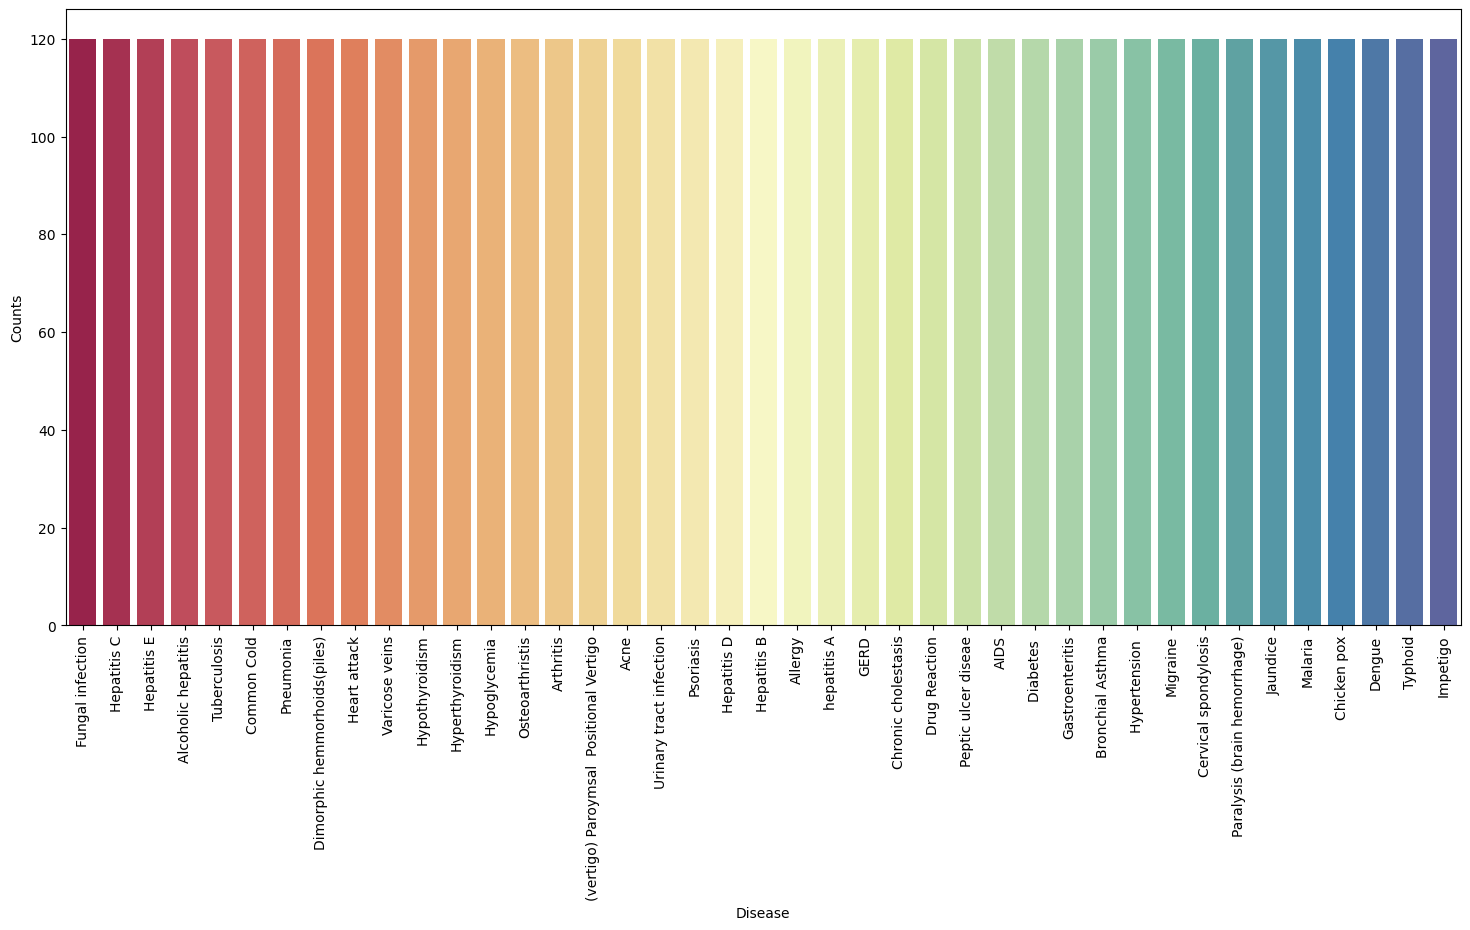

In [10]:
# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
	"Disease": disease_counts.index,
	"Counts": disease_counts.values
})

# The original tutorial did not present palette option. It is useful when you prefer other colours
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df, palette = "Spectral")
plt.xticks(rotation=90)
plt.show()

From the bar chart, we can deduce that it is a balanced dataset since all columns have the same quantity of values.

## Labeling

When we applied the .info() method, we observed that the 'prognosis' column is a variable of type object. This is not favorable for training a machine learning model due to different reasons such as the encoding required by the data, the fact that machine learning algorithms are designed to work with numeric data, or the scalability of the data. Therefore, the best alternative in this case is to apply 'encoding' to the categorical variables (object type) to convert them into numerical representations

In [13]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])